In [3]:
%matplotlib inline 

In [5]:
import numpy as np
import os
import obspy 
import matplotlib.pyplot as plt
import matplotlib.mlab as ml
import matplotlib.cm as cm
import matplotlib.gridspec as gridspec
import matplotlib
from mpl_toolkits.axes_grid import Size
from mpl_toolkits.basemap import Basemap
from mpl_toolkits.axes_grid import make_axes_locatable
import matplotlib.gridspec as gridspec
import scipy
from matplotlib.mlab import griddata
from matplotlib.ticker import MultipleLocator, FormatStrFormatter
from obspy.taup import TauPyModel

In [14]:
ev_listr_real_S = []
ev_listr_real = []

for root, dirs, files in os.walk('/home/diogo/dados_doutorado/parnaiba_basin/RF_migration/Mantle_Transition_Migration_YES_PP/MTZ_data/0.5/'):
    for datafile in files:
        if datafile.endswith('0.5.eqr'):
            ev_listr_real.append(os.path.join(root, datafile))
ev_listr_real_S = sorted(ev_listr_real)

ev_listr_synt_S = []
ev_listr_synt = []
for root, dirs, files in os.walk('/home/diogo/dados_doutorado/parnaiba_basin/RF_migration/Mantle_Transition_Migration_NO_PP/MTZ_data/0.5/'):
    for datafile in files:
        if datafile.endswith('0.5.eqr'):
            ev_listr_synt.append(os.path.join(root, datafile))
ev_listr_synt_S = sorted(ev_listr_synt)

In [16]:
RF_real = []
RP_1_real = []
GCARC_1_real = []
time_PP_wave_real = []
time_P410_wave_real = []
time_P660_wave_real = []
time_Pp410_wave_real = []
time_Pp660_wave_real = []
for i,j in enumerate(ev_listr_real_S):
    b = obspy.read(j)
    RF_real.append(b[0].data)
    time_real = b[0].times()
    RP_1_real.append(b[0].stats.sac.user8)
    GCARC_1_real.append(b[0].stats.sac.gcarc)
    
    model_real = TauPyModel(model="iasp91")
    arrivalsP_real = model_real.get_travel_times(source_depth_in_km=b[0].stats.sac.evdp/1000, distance_in_degree=b[0].stats.sac.gcarc, phase_list=["P"])
    arrP_real = arrivalsP_real[0]
    
    arrivalsP410_real = model_real.get_travel_times(source_depth_in_km=b[0].stats.sac.evdp/1000, distance_in_degree=b[0].stats.sac.gcarc, phase_list=["P410s"])
    arrP410_real = arrivalsP410_real[0]

    arrivalsPp410_real = model_real.get_travel_times(source_depth_in_km=b[0].stats.sac.evdp/1000, distance_in_degree=b[0].stats.sac.gcarc, phase_list=["PPv410s"])
    arrPp410_real = arrivalsPp410_real[0]

    arrivalsP660_real = model_real.get_travel_times(source_depth_in_km=b[0].stats.sac.evdp/1000, distance_in_degree=b[0].stats.sac.gcarc, phase_list=["P660s"])
    arrP660_real = arrivalsP660_real[0]
    
    arrivalsPp660_real = model_real.get_travel_times(source_depth_in_km=b[0].stats.sac.evdp/1000, distance_in_degree=b[0].stats.sac.gcarc, phase_list=["PPv660s"])
    arrPp660_real = arrivalsPp660_real[0]
    
    arrivalsPP_real = model_real.get_travel_times(source_depth_in_km=b[0].stats.sac.evdp/1000, distance_in_degree=b[0].stats.sac.gcarc, phase_list=["PP"])
    arrPP_real = arrivalsPP_real[0]

    time_PP_wave_real.append(arrPP_real.time - arrP_real.time + 10)
    
    time_P410_wave_real.append(arrP410_real.time - arrP_real.time + 10)
  
    time_Pp410_wave_real.append(arrPp410_real.time - arrP_real.time + 10)
    
    time_P660_wave_real.append(arrP660_real.time - arrP_real.time + 10)
    
    time_Pp660_wave_real.append(arrPp660_real.time - arrP_real.time + 10)

In [17]:
RF_synth = []
RP_1_synth = []
GCARC_1_synth = []
time_PP_wave_synth = []
time_P410_wave_synth = []
time_P660_wave_synth = []
time_Pp410_wave_synth = []
time_Pp660_wave_synth = []

for i,j in enumerate(ev_listr_synt_S):
    b = obspy.read(j)
    RF_synth.append(b[0].data)
    time_synth = b[0].times()
    RP_1_synth.append(b[0].stats.sac.user8)
    GCARC_1_synth.append(b[0].stats.sac.gcarc)
    
    model_synth = TauPyModel(model="iasp91")
    
    arrivalsP_synth = model_synth.get_travel_times(source_depth_in_km=b[0].stats.sac.evdp/1000, distance_in_degree=b[0].stats.sac.gcarc, phase_list=["P"])
    arrP_synth = arrivalsP_synth[0]
    
    arrivalsP410_synth = model_synth.get_travel_times(source_depth_in_km=b[0].stats.sac.evdp/1000, distance_in_degree=b[0].stats.sac.gcarc, phase_list=["P410s"])
    arrP410_synth = arrivalsP410_synth[0]
    
    arrivalsPp410_synth = model_synth.get_travel_times(source_depth_in_km=b[0].stats.sac.evdp/1000, distance_in_degree=b[0].stats.sac.gcarc, phase_list=["PPv410s"])
    arrPp410_synth = arrivalsPp410_synth[0]
    
    arrivalsP660_synth = model_synth.get_travel_times(source_depth_in_km=b[0].stats.sac.evdp/1000, distance_in_degree=b[0].stats.sac.gcarc, phase_list=["P660s"])
    arrP660_synth = arrivalsP660_synth[0]
    
    arrivalsPp660_synth = model_synth.get_travel_times(source_depth_in_km=b[0].stats.sac.evdp/1000, distance_in_degree=b[0].stats.sac.gcarc, phase_list=["PPv660s"])
    arrPp660_synth = arrivalsPp660_synth[0]

    arrivalsPP_synth = model_synth.get_travel_times(source_depth_in_km=b[0].stats.sac.evdp/1000, distance_in_degree=b[0].stats.sac.gcarc, phase_list=["PP"])
    arrPP_synth = arrivalsPP_synth[0]

    time_PP_wave_synth.append(arrPP_synth.time - arrP_synth.time + 10)
    
    time_P410_wave_synth.append(arrP410_synth.time - arrP_synth.time + 10)
    
    time_Pp410_wave_synth.append(arrPp410_synth.time - arrP_synth.time + 10)
    
    time_P660_wave_synth.append(arrP660_synth.time - arrP_synth.time + 10)
    
    time_Pp660_wave_synth.append(arrPp660_synth.time - arrP_synth.time + 10)

In [18]:
#RF_orglisl_real = np.argsort(GCARC_1_real)[::-1] 
#RF_orglisl_synth = np.argsort(GCARC_1_synth)[::-1]
RF_orglisl_real = np.argsort(GCARC_1_real)
RF_orglisl_synth = np.argsort(GCARC_1_synth)

In [19]:
FR_real = []
GCARC_real = []
RP_real = [] 
time_PP_wave_corrected_real = []
time_P410_wave_corrected_real = []
time_Pp410_wave_corrected_real = []
time_P660_wave_corrected_real = []
time_Pp660_wave_corrected_real = []

for i,j in enumerate(RF_orglisl_real):
    FR_real.append(RF_real[j])
    GCARC_real.append(GCARC_1_real[j])
    RP_real.append(RP_1_real[j])
    time_PP_wave_corrected_real.append(time_PP_wave_real[j])
    time_P410_wave_corrected_real.append(time_P410_wave_real[j])
    time_Pp410_wave_corrected_real.append(time_Pp410_wave_real[j])
    time_P660_wave_corrected_real.append(time_P660_wave_real[j])
    time_Pp660_wave_corrected_real.append(time_Pp660_wave_real[j])

FR_synth = []
GCARC_synth = []
RP_synth = [] 
time_PP_wave_corrected_synth = []
time_P410_wave_corrected_synth = []
time_Pp410_wave_corrected_synth = []
time_P660_wave_corrected_synth = []
time_Pp660_wave_corrected_synth = []

for i,j in enumerate(RF_orglisl_synth):
    FR_synth.append(RF_synth[j])
    GCARC_synth.append(GCARC_1_synth[j])
    RP_synth.append(RP_1_synth[j])
    time_PP_wave_corrected_synth.append(time_PP_wave_synth[j])
    time_P410_wave_corrected_synth.append(time_P410_wave_synth[j])
    time_Pp410_wave_corrected_synth.append(time_Pp410_wave_synth[j])
    time_P660_wave_corrected_synth.append(time_P660_wave_synth[j])
    time_Pp660_wave_corrected_synth.append(time_Pp660_wave_synth[j])

In [20]:
Z_real = np.array(FR_real)
Z_synth = np.array(FR_synth)

[Text(0,0,'30.0'),
 Text(0,0,'33.7'),
 Text(0,0,'37.1'),
 Text(0,0,'40.8'),
 Text(0,0,'46.8')]

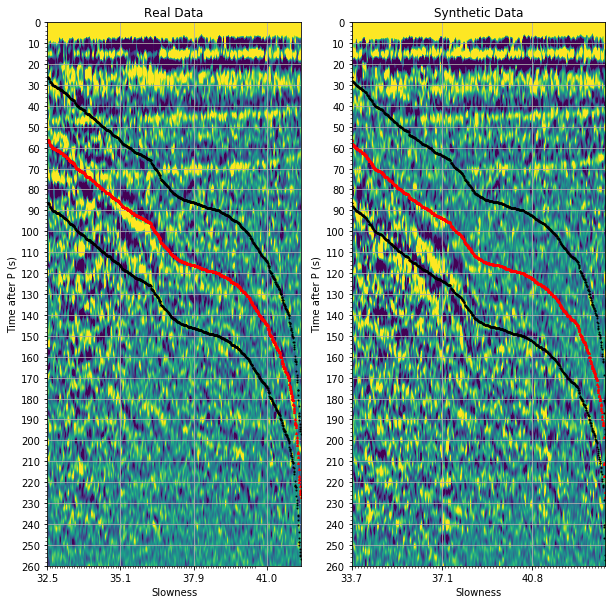

In [21]:
fig, (ax,ax1) = plt.subplots(1, 2, figsize=(10, 10))

majorLocatorX = MultipleLocator(300)
majorLocatorY = MultipleLocator(100)
minorLocatorY = MultipleLocator(20)
minorLocatorX = MultipleLocator(10)


#Sismograma sem filtro PP
v=0.008
im = ax.imshow(Z_real.T, interpolation='bicubic', cmap=cm.viridis,
                origin='upper', aspect='auto',
                vmax=v, vmin=-v)
                #vmax=abs(Z.min()), vmin=Z.min())
for i,j in enumerate(time_PP_wave_corrected_real):
    ax.plot(i,(j-30)*10,'.k',markersize=2)
    ax.plot(i,j*10,'^r',markersize=2)
    ax.plot(i,(j+30)*10,'.k',markersize=2)
    
ax.set_ylim(2700,100)
ax.xaxis.set_major_locator(majorLocatorX)
ax.yaxis.set_major_locator(majorLocatorY)
ax.xaxis.set_minor_locator(minorLocatorX)
ax.yaxis.set_minor_locator(minorLocatorY)
ax.set_ylabel('Time after P (s)')
ax.set_xlabel('Slowness')
ax.set_title('Real Data')

ax.grid(True)
ax.set_yticklabels(["{0:.0f}".format(time_real[i]) for i in np.arange(-100,len(time_real),100)])
#ax.set_xticklabels(["{0:.1f}".format(RP_real[i]*100) for i in np.arange(0,len(RP_real),100)])
ax.set_xticklabels(["{0:.1f}".format(GCARC_real[i]) for i in np.arange(0,len(GCARC_real),100)])

#Sismograma com filtro PP

im = ax1.imshow(Z_synth.T, interpolation='bicubic', cmap=cm.viridis,
                origin='upper', aspect='auto',
                vmax=v, vmin=-v)

for i,j in enumerate(time_PP_wave_corrected_synth):
    ax1.plot(i,(j-30)*10,'.k',markersize=2)
    ax1.plot(i,(j)*10,'^r',markersize=2)
    ax1.plot(i,(j+30)*10,'.k',markersize=2)
               
ax1.set_ylim(2700,100)
ax1.set_ylabel('Time after P (s)')
ax1.set_xlabel('Slowness')
ax1.set_title('Synthetic Data')

ax1.xaxis.set_major_locator(majorLocatorX)
ax1.yaxis.set_major_locator(majorLocatorY)
ax1.xaxis.set_minor_locator(minorLocatorX)
ax1.yaxis.set_minor_locator(minorLocatorY)


ax1.grid(True)
ax1.set_yticklabels(["{0:.0f}".format(time_synth[i]) for i in np.arange(-100,len(time_synth),100)])
#ax1.set_xticklabels(["{0:.1f}".format(RP_synth[i]*100) for i in np.arange(0,len(RP_synth),100)])
ax1.set_xticklabels(["{0:.1f}".format(GCARC_synth[i]) for i in np.arange(0,len(GCARC_synth),100)])



[Text(0,0,'30.0'),
 Text(0,0,'33.7'),
 Text(0,0,'37.1'),
 Text(0,0,'40.8'),
 Text(0,0,'46.8')]

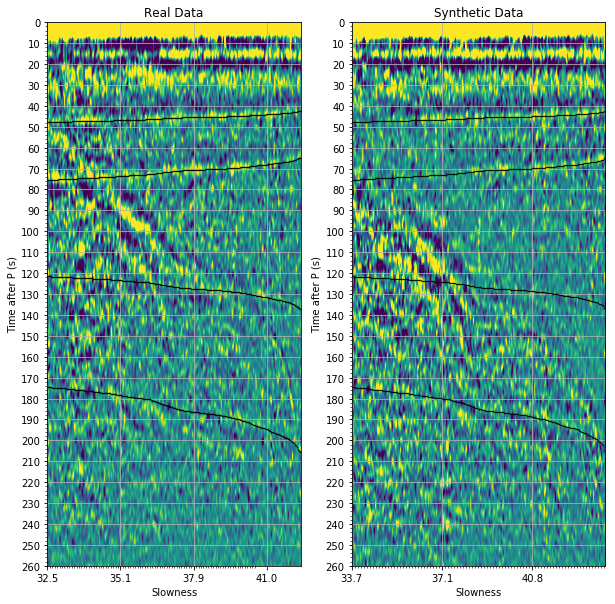

In [31]:
fig, (ax,ax1) = plt.subplots(1, 2, figsize=(10, 10))

majorLocatorX = MultipleLocator(300)
majorLocatorY = MultipleLocator(100)
minorLocatorY = MultipleLocator(20)
minorLocatorX = MultipleLocator(10)


#Sismograma sem filtro PP
v=0.01
im = ax.imshow(Z_real.T, interpolation='bicubic', cmap=cm.viridis,
                origin='upper', aspect='auto',
                vmax=v, vmin=-v)
                #vmax=abs(Z.min()), vmin=Z.min())

for i,j in enumerate(time_P410_wave_corrected_real):
    ax.plot(i,j*10,'.k',markersize=0.5,alpha=0.75)

for i,j in enumerate(time_Pp410_wave_corrected_real):
    ax.plot(i,j*10,'.k',markersize=0.5,alpha=0.75)
    
for i,j in enumerate(time_P660_wave_corrected_real):
    ax.plot(i,j*10,'.k',markersize=0.5,alpha=0.75)
    
for i,j in enumerate(time_Pp660_wave_corrected_real):
    ax.plot(i,j*10,'.k',markersize=0.5,alpha=0.75)
    
ax.set_ylim(2700,100)
ax.xaxis.set_major_locator(majorLocatorX)
ax.yaxis.set_major_locator(majorLocatorY)
ax.xaxis.set_minor_locator(minorLocatorX)
ax.yaxis.set_minor_locator(minorLocatorY)
ax.set_ylabel('Time after P (s)')
ax.set_xlabel('Slowness')
ax.set_title('Real Data')

ax.grid(True)
ax.set_yticklabels(["{0:.0f}".format(time_real[i]) for i in np.arange(-100,len(time_real),100)])
#ax.set_xticklabels(["{0:.1f}".format(RP_real[i]*100) for i in np.arange(0,len(RP_real),100)])
ax.set_xticklabels(["{0:.1f}".format(GCARC_real[i]) for i in np.arange(0,len(GCARC_real),100)])

#Sismograma com filtro PP

im = ax1.imshow(Z_synth.T, interpolation='bicubic', cmap=cm.viridis,
                origin='upper', aspect='auto',
                vmax=v, vmin=-v)

for i,j in enumerate(time_P410_wave_corrected_synth):
    ax1.plot(i,j*10,'.k',markersize=0.5,alpha=0.75)

for i,j in enumerate(time_Pp410_wave_corrected_synth):
    ax1.plot(i,j*10,'.k',markersize=0.5,alpha=0.75)
    
for i,j in enumerate(time_P660_wave_corrected_synth):
    ax1.plot(i,j*10,'.k',markersize=0.5,alpha=0.75)

for i,j in enumerate(time_Pp660_wave_corrected_synth):
    ax1.plot(i,j*10,'.k',markersize=0.5,alpha=0.75)
               
ax1.set_ylim(2700,100)
ax1.set_ylabel('Time after P (s)')
ax1.set_xlabel('Slowness')
ax1.set_title('Synthetic Data')

ax1.xaxis.set_major_locator(majorLocatorX)
ax1.yaxis.set_major_locator(majorLocatorY)
ax1.xaxis.set_minor_locator(minorLocatorX)
ax1.yaxis.set_minor_locator(minorLocatorY)


ax1.grid(True)
ax1.set_yticklabels(["{0:.0f}".format(time_synth[i]) for i in np.arange(-100,len(time_synth),100)])
#ax1.set_xticklabels(["{0:.1f}".format(RP_synth[i]*100) for i in np.arange(0,len(RP_synth),100)])
ax1.set_xticklabels(["{0:.1f}".format(GCARC_synth[i]) for i in np.arange(0,len(GCARC_synth),100)])



[Text(0,0,'30.0'),
 Text(0,0,'33.7'),
 Text(0,0,'37.1'),
 Text(0,0,'40.8'),
 Text(0,0,'46.8')]

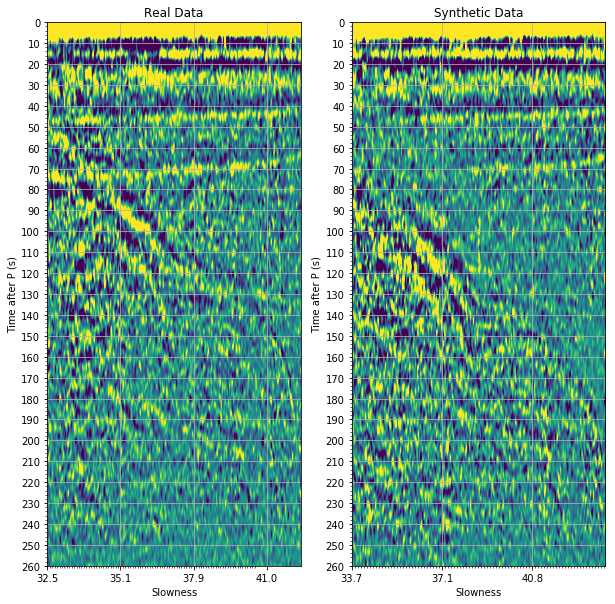

In [26]:
fig, (ax,ax1) = plt.subplots(1, 2, figsize=(10, 10))

majorLocatorX = MultipleLocator(300)
majorLocatorY = MultipleLocator(100)
minorLocatorY = MultipleLocator(20)
minorLocatorX = MultipleLocator(10)


#Sismograma sem filtro PP
v=0.008
im = ax.imshow(Z_real.T, interpolation='bicubic', cmap=cm.viridis,
                origin='upper', aspect='auto',
                vmax=v, vmin=-v)
                #vmax=abs(Z.min()), vmin=Z.min())

ax.set_ylim(2700,100)
ax.xaxis.set_major_locator(majorLocatorX)
ax.yaxis.set_major_locator(majorLocatorY)
ax.xaxis.set_minor_locator(minorLocatorX)
ax.yaxis.set_minor_locator(minorLocatorY)
ax.set_ylabel('Time after P (s)')
ax.set_xlabel('Slowness')
ax.set_title('Real Data')

ax.grid(True)
ax.set_yticklabels(["{0:.0f}".format(time_real[i]) for i in np.arange(-100,len(time_real),100)])
#ax.set_xticklabels(["{0:.1f}".format(RP_real[i]*100) for i in np.arange(0,len(RP_real),100)])
ax.set_xticklabels(["{0:.1f}".format(GCARC_real[i]) for i in np.arange(0,len(GCARC_real),100)])

#Sismograma com filtro PP

im = ax1.imshow(Z_synth.T, interpolation='bicubic', cmap=cm.viridis,
                origin='upper', aspect='auto',
                vmax=v, vmin=-v)

ax1.set_ylim(2700,100)
ax1.set_ylabel('Time after P (s)')
ax1.set_xlabel('Slowness')
ax1.set_title('Synthetic Data')

ax1.xaxis.set_major_locator(majorLocatorX)
ax1.yaxis.set_major_locator(majorLocatorY)
ax1.xaxis.set_minor_locator(minorLocatorX)
ax1.yaxis.set_minor_locator(minorLocatorY)


ax1.grid(True)
ax1.set_yticklabels(["{0:.0f}".format(time_synth[i]) for i in np.arange(-100,len(time_synth),100)])
#ax1.set_xticklabels(["{0:.1f}".format(RP_synth[i]*100) for i in np.arange(0,len(RP_synth),100)])
ax1.set_xticklabels(["{0:.1f}".format(GCARC_synth[i]) for i in np.arange(0,len(GCARC_synth),100)])



[Text(0,0,'30.0'),
 Text(0,0,'33.7'),
 Text(0,0,'37.1'),
 Text(0,0,'40.8'),
 Text(0,0,'46.8')]

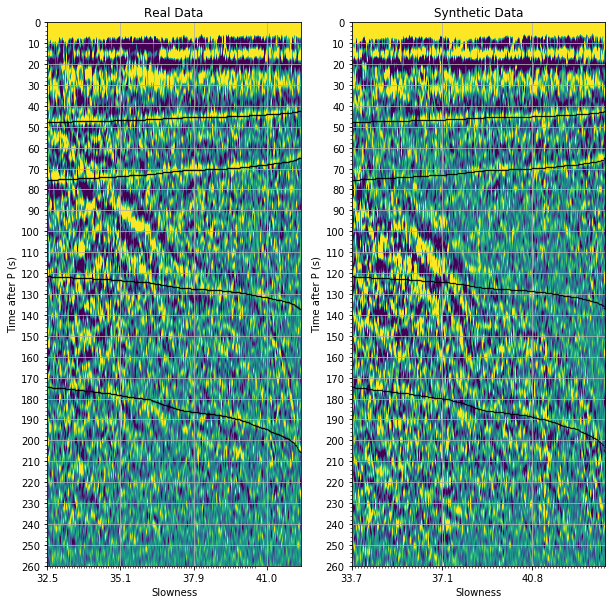

In [29]:
fig, (ax,ax1) = plt.subplots(1, 2, figsize=(10, 10))

majorLocatorX = MultipleLocator(300)
majorLocatorY = MultipleLocator(100)
minorLocatorY = MultipleLocator(20)
minorLocatorX = MultipleLocator(10)


#Sismograma sem filtro PP
v=0.008
im = ax.imshow(Z_real.T, interpolation='bilinear', cmap=cm.viridis,
                origin='upper', aspect='auto',
                vmax=v, vmin=-v)
                #vmax=abs(Z.min()), vmin=Z.min())

for i,j in enumerate(time_P410_wave_corrected_real):
    ax.plot(i,j*10,'.k',markersize=0.5,alpha=0.75)

for i,j in enumerate(time_Pp410_wave_corrected_real):
    ax.plot(i,j*10,'.k',markersize=0.5,alpha=0.75)
    
for i,j in enumerate(time_P660_wave_corrected_real):
    ax.plot(i,j*10,'.k',markersize=0.5,alpha=0.75)
    
for i,j in enumerate(time_Pp660_wave_corrected_real):
    ax.plot(i,j*10,'.k',markersize=0.5,alpha=0.75)
    
ax.set_ylim(2700,100)
ax.xaxis.set_major_locator(majorLocatorX)
ax.yaxis.set_major_locator(majorLocatorY)
ax.xaxis.set_minor_locator(minorLocatorX)
ax.yaxis.set_minor_locator(minorLocatorY)
ax.set_ylabel('Time after P (s)')
ax.set_xlabel('Slowness')
ax.set_title('Real Data')

ax.grid(True)
ax.set_yticklabels(["{0:.0f}".format(time_real[i]) for i in np.arange(-100,len(time_real),100)])
#ax.set_xticklabels(["{0:.1f}".format(RP_real[i]*100) for i in np.arange(0,len(RP_real),100)])
ax.set_xticklabels(["{0:.1f}".format(GCARC_real[i]) for i in np.arange(0,len(GCARC_real),100)])

#Sismograma com filtro PP

im = ax1.imshow(Z_synth.T, interpolation='bilinear', cmap=cm.viridis,
                origin='upper', aspect='auto',
                vmax=v, vmin=-v)

for i,j in enumerate(time_P410_wave_corrected_synth):
    ax1.plot(i,j*10,'.k',markersize=0.5,alpha=0.75)

for i,j in enumerate(time_Pp410_wave_corrected_synth):
    ax1.plot(i,j*10,'.k',markersize=0.5,alpha=0.75)
    
for i,j in enumerate(time_P660_wave_corrected_synth):
    ax1.plot(i,j*10,'.k',markersize=0.5,alpha=0.75)

for i,j in enumerate(time_Pp660_wave_corrected_synth):
    ax1.plot(i,j*10,'.k',markersize=0.5,alpha=0.75)
               
ax1.set_ylim(2700,100)
ax1.set_ylabel('Time after P (s)')
ax1.set_xlabel('Slowness')
ax1.set_title('Synthetic Data')

ax1.xaxis.set_major_locator(majorLocatorX)
ax1.yaxis.set_major_locator(majorLocatorY)
ax1.xaxis.set_minor_locator(minorLocatorX)
ax1.yaxis.set_minor_locator(minorLocatorY)


ax1.grid(True)
ax1.set_yticklabels(["{0:.0f}".format(time_synth[i]) for i in np.arange(-100,len(time_synth),100)])
#ax1.set_xticklabels(["{0:.1f}".format(RP_synth[i]*100) for i in np.arange(0,len(RP_synth),100)])
ax1.set_xticklabels(["{0:.1f}".format(GCARC_synth[i]) for i in np.arange(0,len(GCARC_synth),100)])



[Text(0,0,'30.0'),
 Text(0,0,'33.7'),
 Text(0,0,'37.1'),
 Text(0,0,'40.8'),
 Text(0,0,'46.8')]

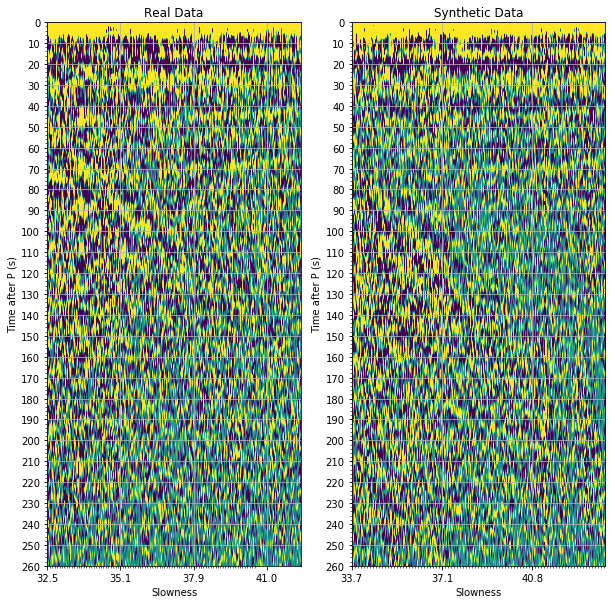

In [28]:
fig, (ax,ax1) = plt.subplots(1, 2, figsize=(10, 10))

majorLocatorX = MultipleLocator(300)
majorLocatorY = MultipleLocator(100)
minorLocatorY = MultipleLocator(20)
minorLocatorX = MultipleLocator(10)


#Sismograma sem filtro PP
v=0.008
im = ax.imshow(Z_real.T, interpolation='none', cmap=cm.viridis,
                origin='upper', aspect='auto',
                vmax=v, vmin=-v)
                #vmax=abs(Z.min()), vmin=Z.min())


    
ax.set_ylim(2700,100)
ax.xaxis.set_major_locator(majorLocatorX)
ax.yaxis.set_major_locator(majorLocatorY)
ax.xaxis.set_minor_locator(minorLocatorX)
ax.yaxis.set_minor_locator(minorLocatorY)
ax.set_ylabel('Time after P (s)')
ax.set_xlabel('Slowness')
ax.set_title('Real Data')

ax.grid(True)
ax.set_yticklabels(["{0:.0f}".format(time_real[i]) for i in np.arange(-100,len(time_real),100)])
#ax.set_xticklabels(["{0:.1f}".format(RP_real[i]*100) for i in np.arange(0,len(RP_real),100)])
ax.set_xticklabels(["{0:.1f}".format(GCARC_real[i]) for i in np.arange(0,len(GCARC_real),100)])

#Sismograma com filtro PP

im = ax1.imshow(Z_synth.T, interpolation='none', cmap=cm.viridis,
                origin='upper', aspect='auto',
                vmax=v, vmin=-v)


ax1.set_ylim(2700,100)
ax1.set_ylabel('Time after P (s)')
ax1.set_xlabel('Slowness')
ax1.set_title('Synthetic Data')

ax1.xaxis.set_major_locator(majorLocatorX)
ax1.yaxis.set_major_locator(majorLocatorY)
ax1.xaxis.set_minor_locator(minorLocatorX)
ax1.yaxis.set_minor_locator(minorLocatorY)


ax1.grid(True)
ax1.set_yticklabels(["{0:.0f}".format(time_synth[i]) for i in np.arange(-100,len(time_synth),100)])
#ax1.set_xticklabels(["{0:.1f}".format(RP_synth[i]*100) for i in np.arange(0,len(RP_synth),100)])
ax1.set_xticklabels(["{0:.1f}".format(GCARC_synth[i]) for i in np.arange(0,len(GCARC_synth),100)])

